In [1]:
import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import os

# GC.1

In [11]:
# Path to your distance matrix
matrix_path = "/groups/mb928_gp/mp4486/tobias/CURRENT/BINDetect_output/GN.1/bindetect_distances.txt"
# 1️⃣ Read raw file
df_raw = pd.read_csv(matrix_path, sep="\t", header=None)

In [12]:
tf_all = df_raw.iloc[0]
# Add names to rows & columns
df = df_raw.copy()
df = df.drop(index=0)
df.index = tf_all
df.columns = tf_all

In [13]:
# Make sure the matrix is symmetric and diagonal = 0
df.values[np.tril_indices_from(df)] = df.values[np.tril_indices_from(df.T)]
for i in range(len(df)):
    df.iat[i, i] = 0

Cleaned matrix shape: (879, 879)


,# ALX3_MA0634.2,ARGFX_MA1463.2,ARNT2_MA1464.2,ARNTHIF1A_MA0259.2,ASCL1_MA1100.3
0,,,,,
# ALX3_MA0634.2,0,0.2527,1.0000,1.0000,1.0000
ARGFX_MA1463.2,0.2527,0,1.0000,1.0000,1.0000
ARNT2_MA1464.2,1.0000,1.0000,0,0.3745,0.9998
ARNTHIF1A_MA0259.2,1.0000,1.0000,0.3745,0,1.0000
ASCL1_MA1100.3,1.0000,1.0000,0.9998,1.0000,0


In [14]:
# Convert to condensed distance format
condensed = df.values[np.triu_indices_from(df, k=1)]

# Hierarchical clustering
Z_full = linkage(condensed, method="average")

In [15]:
my_tfs = ["ZIC4_MA0751.2", "ZIC5_MA1584.2",
  "EGR1_MA0162.5", "EGR2_MA0472.2", "EGR3_MA0732.2", "EGR4_MA0733.2",
  "KLF15_MA1513.2", "ZNF549_MA1728.2", "Zfp961_MA2126.1", "PATZ1_MA1961.2", "ZNF148_MA1653.2", "MAZ_MA1522.2",
  "ZNF384_MA1125.2",
  "MYOG_MA0500.3", "ASCL1_MA1100.3"]

In [16]:
# Get global order from full dendrogram
dendro_full = dendrogram(Z_full, labels=df.index, no_plot=True)
global_order = dendro_full["ivl"]

# Keep your subset in that global order
tf_ordered = [tf for tf in global_order if tf in my_tfs]
print("Subset order:", tf_ordered)

# Subset matrix
sub_df = df.loc[tf_ordered, tf_ordered]

# Plot subset dendrogram
condensed_sub = sub_df.values[np.triu_indices_from(sub_df, k=1)]
Z_sub = linkage(condensed_sub, method="average")

Subset order: ['ASCL1_MA1100.3', 'MYOG_MA0500.3', 'ZNF549_MA1728.2', 'Zfp961_MA2126.1', 'ZIC5_MA1584.2', 'ZIC4_MA0751.2', 'EGR1_MA0162.5', 'EGR4_MA0733.2', 'EGR2_MA0472.2', 'EGR3_MA0732.2', 'KLF15_MA1513.2', 'PATZ1_MA1961.2', 'MAZ_MA1522.2', 'ZNF148_MA1653.2', 'ZNF384_MA1125.2']


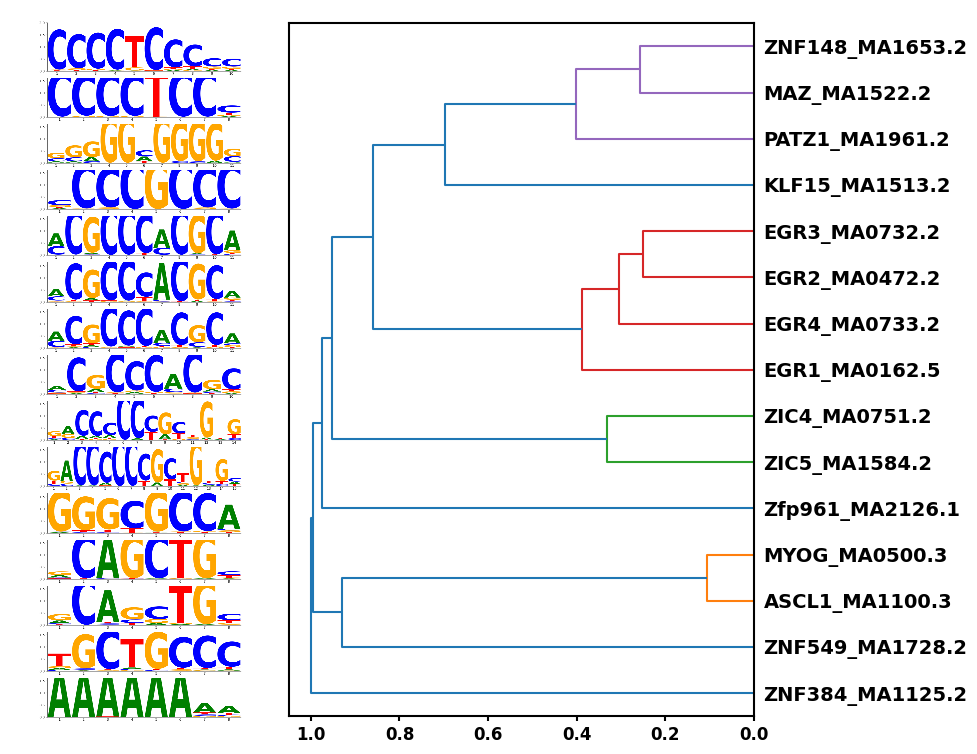

In [18]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib as mpl
import os

motif_root = "/groups/mb928_gp/mp4486/tobias/CURRENT/BINDetect_output/InN.5"

# --- Global settings: ensure fonts are bold + PDF renders them correctly ---
mpl.rcParams['pdf.fonttype'] = 42      # Embed as TrueType (works in Illustrator, Inkscape, etc.)
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.weight'] = 'bold'   # Force global bold
mpl.rcParams['axes.linewidth'] = 1.5   # Thicker border lines

# --- Create figure ---
fig, ax = plt.subplots(figsize=(6, 0.6 * len(tf_ordered)))

# --- Plot dendrogram ---
dendro = dendrogram(
    Z_sub,
    labels=tf_ordered,
    orientation="left",
    leaf_font_size=14,      # Increase base label size
    ax=ax,
    color_threshold=0.5
)

# --- Make y-axis tick labels bold manually ---
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_fontweight("bold")
    tick.set_fontname("DejaVu Sans")

# Optional: style x-axis too
ax.tick_params(axis='x', labelsize=12, width=1.5)

# --- Add motif images to the left ---
for label in dendro["ivl"]:
    img_path = os.path.join(motif_root, label, f"{label}.png")
    if not os.path.exists(img_path):
        print(f"⚠️ No motif image for {label}")
        continue

    img = mpimg.imread(img_path)
    imagebox = OffsetImage(img, zoom=0.18)  # adjust image size
    idx = dendro["ivl"].index(label)
    y = ax.get_yticks()[idx]
    ab = AnnotationBbox(
        imagebox,
        (-0.05, y),
        xycoords=("axes fraction", "data"),
        frameon=False,
        box_alignment=(1, 0.5)
    )
    ax.add_artist(ab)

# --- Force rendering before saving ---
fig.canvas.draw()

# --- Save as vector-quality PDF ---
fig.savefig(
    "subdendrogram_GC1.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True
)

plt.show()

# InN.5

In [26]:
# Path to your distance matrix
matrix_path = "/groups/mb928_gp/mp4486/tobias/CURRENT/BINDetect_output/InN.5/bindetect_distances.txt"

# 1️⃣ Read raw file
df_raw = pd.read_csv(matrix_path, sep="\t", header=None)

In [20]:
tf_all = df_raw.iloc[0]
# Add names to rows & columns
df = df_raw.copy()
df = df.drop(index=0)
df.index = tf_all
df.columns = tf_all

In [21]:
# Make sure the matrix is symmetric and diagonal = 0
df.values[np.tril_indices_from(df)] = df.values[np.tril_indices_from(df.T)]
for i in range(len(df)):
    df.iat[i, i] = 0

In [22]:
# Convert to condensed distance format
condensed = df.values[np.triu_indices_from(df, k=1)]

# Hierarchical clustering
Z_full = linkage(condensed, method="average")

In [23]:
my_tfs = ["KLF15_MA1513.2", "SP2_MA0516.3", "ZBED4_MA2328.1", "TFAP2B_MA0811.2", "TFAP2C_MA0524.3", "KLF3_MA1516.2", 
                    "ZNF93_MA1721.2","Foxn1_MA1684.1", "ZNF692_MA1986.2", 
                    "ZBED4_MA2328.1", "ZBTB24_MA2330.1",
                    "PATZ1_MA1961.2", "KLF10_MA1511.2", "KLF14_MA0740.2", "EGR3_MA0732.2",
                    "KLF2_MA1515.2", "KLF7_MA1959.2"]

In [24]:
# Get global order from full dendrogram
dendro_full = dendrogram(Z_full, labels=df.index, no_plot=True)
global_order = dendro_full["ivl"]

# Keep your subset in that global order
tf_ordered = [tf for tf in global_order if tf in my_tfs]
print("Subset order:", tf_ordered)

# Subset matrix
sub_df = df.loc[tf_ordered, tf_ordered]

# Plot subset dendrogram
condensed_sub = sub_df.values[np.triu_indices_from(sub_df, k=1)]
Z_sub = linkage(condensed_sub, method="average")

Subset order: ['Foxn1_MA1684.1', 'ZBTB24_MA2330.1', 'TFAP2B_MA0811.2', 'TFAP2C_MA0524.3', 'ZNF692_MA1986.2', 'EGR3_MA0732.2', 'ZBED4_MA2328.1', 'KLF3_MA1516.2', 'KLF15_MA1513.2', 'SP2_MA0516.3', 'PATZ1_MA1961.2', 'KLF10_MA1511.2', 'KLF14_MA0740.2', 'KLF2_MA1515.2', 'KLF7_MA1959.2', 'ZNF93_MA1721.2']


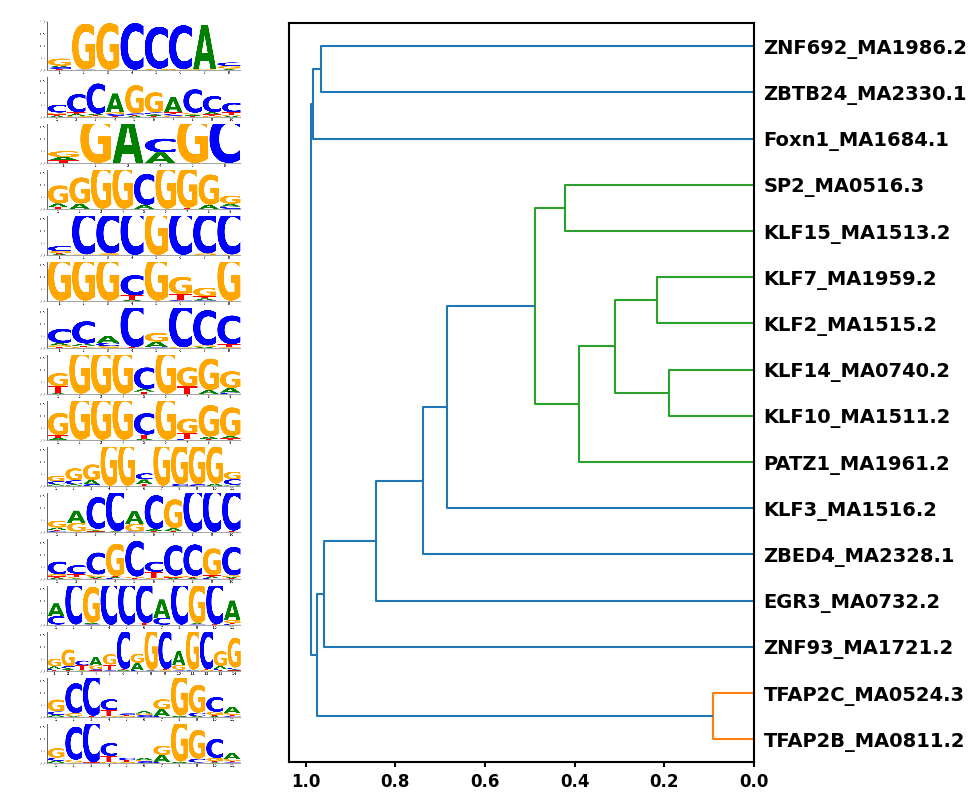

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib as mpl
import os

motif_root = "/groups/mb928_gp/mp4486/tobias/CURRENT/BINDetect_output/InN.5"

# --- Global settings: ensure fonts are bold + PDF renders them correctly ---
mpl.rcParams['pdf.fonttype'] = 42      # Embed as TrueType (works in Illustrator, Inkscape, etc.)
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.weight'] = 'bold'   # Force global bold
mpl.rcParams['axes.linewidth'] = 1.5   # Thicker border lines

# --- Create figure ---
fig, ax = plt.subplots(figsize=(6, 0.6 * len(tf_ordered)))

# --- Plot dendrogram ---
dendro = dendrogram(
    Z_sub,
    labels=tf_ordered,
    orientation="left",
    leaf_font_size=14,      # Increase base label size
    ax=ax,
    color_threshold=0.5
)

# --- Make y-axis tick labels bold manually ---
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_fontweight("bold")
    tick.set_fontname("DejaVu Sans")

# Optional: style x-axis too
ax.tick_params(axis='x', labelsize=12, width=1.5)

# --- Add motif images to the left ---
for label in dendro["ivl"]:
    img_path = os.path.join(motif_root, label, f"{label}.png")
    if not os.path.exists(img_path):
        print(f"⚠️ No motif image for {label}")
        continue

    img = mpimg.imread(img_path)
    imagebox = OffsetImage(img, zoom=0.18)  # adjust image size
    idx = dendro["ivl"].index(label)
    y = ax.get_yticks()[idx]
    ab = AnnotationBbox(
        imagebox,
        (-0.05, y),
        xycoords=("axes fraction", "data"),
        frameon=False,
        box_alignment=(1, 0.5)
    )
    ax.add_artist(ab)

# --- Force rendering before saving ---
fig.canvas.draw()

# --- Save as vector-quality PDF ---
fig.savefig(
    "subdendrogram_GC1.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True
)

plt.show()

# ExN.1

In [27]:
# Path to your distance matrix
matrix_path = "/groups/mb928_gp/mp4486/tobias/CURRENT/BINDetect_output/ExN.1/bindetect_distances.txt"

# 1️⃣ Read raw file
df_raw = pd.read_csv(matrix_path, sep="\t", header=None)

In [28]:
tf_all = df_raw.iloc[0]
# Add names to rows & columns
df = df_raw.copy()
df = df.drop(index=0)
df.index = tf_all
df.columns = tf_all

In [29]:
# Make sure the matrix is symmetric and diagonal = 0
df.values[np.tril_indices_from(df)] = df.values[np.tril_indices_from(df.T)]
for i in range(len(df)):
    df.iat[i, i] = 0

In [30]:
my_tfs = ["KLF15_MA1513.2", "KLF3_MA1516.2", "ZNF682_MA1599.2"]

In [31]:
# Get global order from full dendrogram
dendro_full = dendrogram(Z_full, labels=df.index, no_plot=True)
global_order = dendro_full["ivl"]

# Keep your subset in that global order
tf_ordered = [tf for tf in global_order if tf in my_tfs]
print("Subset order:", tf_ordered)

# Subset matrix
sub_df = df.loc[tf_ordered, tf_ordered]

# Plot subset dendrogram
condensed_sub = sub_df.values[np.triu_indices_from(sub_df, k=1)]
Z_sub = linkage(condensed_sub, method="average")

Subset order: ['ZNF682_MA1599.2', 'KLF3_MA1516.2', 'KLF15_MA1513.2']


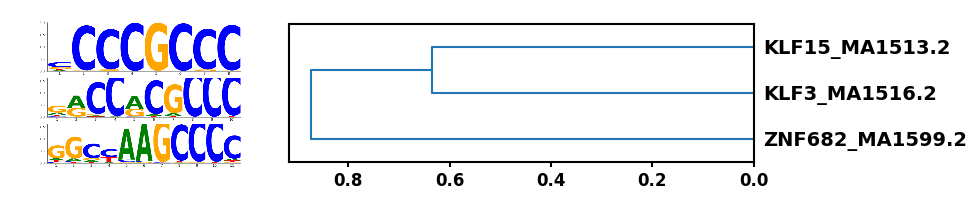

In [32]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import matplotlib as mpl
import os

motif_root = "/groups/mb928_gp/mp4486/tobias/CURRENT/BINDetect_output/InN.5"

# --- Global settings: ensure fonts are bold + PDF renders them correctly ---
mpl.rcParams['pdf.fonttype'] = 42      # Embed as TrueType (works in Illustrator, Inkscape, etc.)
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.weight'] = 'bold'   # Force global bold
mpl.rcParams['axes.linewidth'] = 1.5   # Thicker border lines

# --- Create figure ---
fig, ax = plt.subplots(figsize=(6, 0.6 * len(tf_ordered)))

# --- Plot dendrogram ---
dendro = dendrogram(
    Z_sub,
    labels=tf_ordered,
    orientation="left",
    leaf_font_size=14,      # Increase base label size
    ax=ax,
    color_threshold=0.5
)

# --- Make y-axis tick labels bold manually ---
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)
    tick.set_fontweight("bold")
    tick.set_fontname("DejaVu Sans")

# Optional: style x-axis too
ax.tick_params(axis='x', labelsize=12, width=1.5)

# --- Add motif images to the left ---
for label in dendro["ivl"]:
    img_path = os.path.join(motif_root, label, f"{label}.png")
    if not os.path.exists(img_path):
        print(f"⚠️ No motif image for {label}")
        continue

    img = mpimg.imread(img_path)
    imagebox = OffsetImage(img, zoom=0.18)  # adjust image size
    idx = dendro["ivl"].index(label)
    y = ax.get_yticks()[idx]
    ab = AnnotationBbox(
        imagebox,
        (-0.05, y),
        xycoords=("axes fraction", "data"),
        frameon=False,
        box_alignment=(1, 0.5)
    )
    ax.add_artist(ab)

# --- Force rendering before saving ---
fig.canvas.draw()

# --- Save as vector-quality PDF ---
fig.savefig(
    "subdendrogram_GC1.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True
)

plt.show()